<a href="https://colab.research.google.com/github/Haseebk0678/CISC3440-Machine-Learning/blob/main/SignLanguageMLAutoEncoded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook demonstrates classification with the MNIST dataset - a dataset for handwritten number recognition. Our goal is to look at a picture of a handwritten digit between 0 and 9, and try to recognize what digit it is.

In [ ]:
import matplotlib as mlp
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model





# from sklearn.datasets import fetch_openml
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import SGDClassifier
# from sklearn.linear_model import LogisticRegression

MNIST with binary classification

In [ ]:
# Fetch the MNIST data using sklearn
df_train = pd.read_csv("https://raw.githubusercontent.com/Haseebk0678/CISC3440-Machine-Learning/main/project_data/sign_mnist_train/sign_mnist_train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/Haseebk0678/CISC3440-Machine-Learning/main/project_data/sign_mnist_test/sign_mnist_test.csv")

In [ ]:
X_train = df_train.iloc[:, 1:].astype('float32') / 255.
y_train = df_train.iloc[:, :1]


In [ ]:
X_test = df_test.iloc[:, 1:].astype('float32') / 255.
y_test = df_test.iloc[:, 0:1]

In [ ]:
x_train = X_train.values.reshape(-1,28,28)
x_test = X_test.values.reshape(-1,28,28)

print (x_train.shape)
print (x_test.shape)

(27455, 28, 28)
(7172, 28, 28)


In [ ]:
# https://www.tensorflow.org/tutorials/generative/autoencoder

latent_dim = 64 
import tensorflow as tf

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
858/858 [==============================] - 5s 3ms/step - loss: 0.0188 - val_loss: 0.0132
Epoch 2/10
858/858 [==============================] - 2s 3ms/step - loss: 0.0113 - val_loss: 0.0099
Epoch 3/10
858/858 [==============================] - 2s 3ms/step - loss: 0.0086 - val_loss: 0.0080
Epoch 4/10
858/858 [==============================] - 3s 3ms/step - loss: 0.0075 - val_loss: 0.0073
Epoch 5/10
858/858 [==============================] - 2s 3ms/step - loss: 0.0070 - val_loss: 0.0070
Epoch 6/10
858/858 [==============================] - 2s 3ms/step - loss: 0.0068 - val_loss: 0.0069
Epoch 7/10
858/858 [==============================] - 3s 3ms/step - loss: 0.0067 - val_loss: 0.0068
Epoch 8/10
858/858 [==============================] - 3s 3ms/step - loss: 0.0067 - val_loss: 0.0069
Epoch 9/10
858/858 [==============================] - 3s 3ms/step - loss: 0.0067 - val_loss: 0.0067
Epoch 10/10
858/858 [==============================] - 2s 3ms/step - loss: 0.0066 - val_loss: 0.0067

In [ ]:
encoded_imgs_train = autoencoder.encoder(x_train).numpy()
decoded_imgs_train = autoencoder.decoder(encoded_imgs_train).numpy()

encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

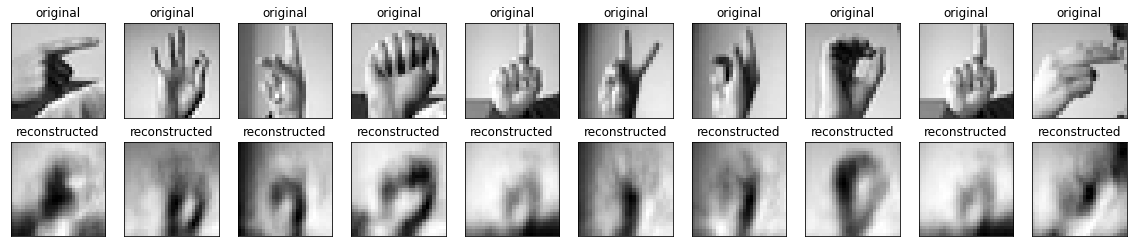

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
batch_size = 128
num_classes = 25
epochs = 15
# input image dimensions
input_shape = (28, 28, 1)


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



In [ ]:

# These were the parameters to choose from 0 - 9, and it seems that the parameters 
# being the same are pretty good for sign language which is every letter besides j and z.
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

TypeError: ignored

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# This is with the untransofrmed data, the one that hasn't been put into an auto encoder

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test))

In [ ]:
# model.add(Dense(units=512,activation='relu'))
# model.add(Dropout(rate=0.25))
# model.add(Dense(units=24,activation='softmax'))
# model.summary()

In [ ]:
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
#          epochs = 35,
#           validation_data=(X_test,y_test),
#           shuffle=1
#          )
# score = model.evaluate(X_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(decoded_imgs_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(decoded_imgs,y_test))

In [ ]:
score = model.evaluate(decoded_imgs, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


AttributeError: ignored

In [ ]:
import cv2
  
  
# define a video capture object
vid = cv2.VideoCapture(0)
  
while(True):
      
    # Capture the video frame
    # by frame
    ret, frame = vid.read()
  
    # Display the resulting frame
    cv2.imshow('frame', frame)
      
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

DisabledFunctionError: ignored

In [ ]:
# from sklearn import metrics
# model_knn = KNeighborsClassifier(n_neighbors = 4, weights = "distance")

# knn_scores = cross_val_score(model_knn, X_train, y_train, cv=3, verbose=2, scoring="accuracy")
# print("KNN", knn_scores)
# model_knn.fit(X_train, y_train)
# y_pred = model_knn.predict(X_test)
# metrics.f1_score(y_test, y_pred, average='weighted')

In [ ]:
# knn = KNeighborsClassifier(weights = 'distance')
# from sklearn.model_selection import GridSearchCV
# k_range = list(range(1, 15))
# param_grid = dict(n_neighbors=k_range)
  
# # defining parameter range
# grid = GridSearchCV(knn, param_grid, cv = 2, scoring='accuracy', return_train_score=False,verbose=2)
# grid_search=grid.fit(X_train, y_train)
# print(grid_search.best_params_)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# model_knn = KNeighborsClassifier(n_neighbors = 1, weights = "distance")

# knn_scores = cross_val_score(model_knn, X_train, y_train, cv=3, verbose=2, scoring="accuracy")
# print("KNN", knn_scores)
# model_knn.fit(X_train, y_train)
# y_pred = model_knn.predict(X_test)
# metrics.f1_score(y_test, y_pred, average='weighted')